In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [20]:
df = pd.read_csv("heaps.dat", sep=',', header=None)
df.head()

,0,1
0,302033,31361
1,317275,33204
2,284943,37778
3,347539,33819
4,302118,37102


In [21]:
size = np.array(df.loc[:,0],dtype=float)
print(len(size))

808


In [22]:
size = np.array([x for x in df.loc[1:,0].values if x >= 0])
diffwords = np.array([x for i,x in enumerate(df.loc[1:,1].values) if x >= 0])

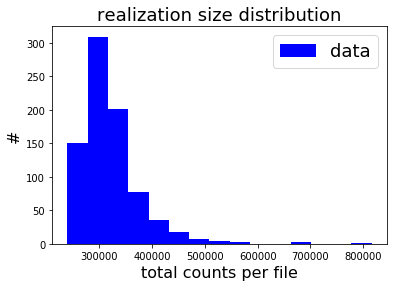

In [23]:
fig = plt.figure()
plt.hist(size, density=False, color='blue', bins = 15, label='data')
plt.title("realization size distribution", fontsize = 18)
plt.xlabel("total counts per file", fontsize=16)
plt.ylabel("#", fontsize=16)
plt.legend(fontsize=18)
plt.show()

In [24]:
fig.savefig("sizeDistr.pdf")

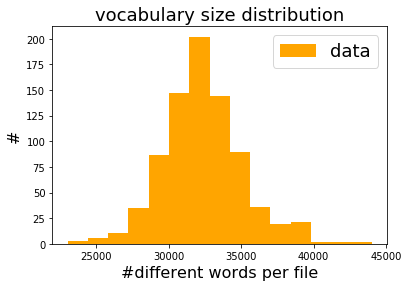

In [25]:
fig = plt.figure()
plt.hist(diffwords, density=False, color='orange', bins = 15, label = 'data')
plt.title("vocabulary size distribution", fontsize=18)
plt.xlabel("#different words per file", fontsize=16)
plt.ylabel("#", fontsize=16)
plt.legend(fontsize=18)
plt.show()

In [26]:
fig.savefig("diffwordsDistr.pdf")

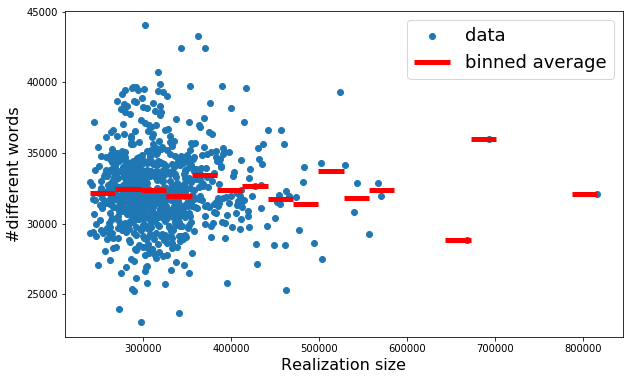

In [27]:
fig = plt.figure(figsize=(10,6))
plt.scatter(size, diffwords, label='data')
plt.xlabel("Realization size", fontsize=16)
plt.ylabel("#different words", fontsize=16)
bin_means, bin_edges, binnumber = stats.binned_statistic(size, diffwords,statistic='mean', bins=20)
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='r', lw=5, label='binned average')
#plt.xscale('log')
#plt.yscale('log')
plt.legend(fontsize=18)
plt.show()

In [28]:
fig.savefig("heaps.pdf")

# null model

In [29]:
df_null = pd.read_csv("heaps_null.dat", sep=',', header=None)
df_null.head()

,0,1
0,383751,19215
1,302033,19505
2,317275,18812
3,284943,20020
4,347539,19306


In [30]:
size_null = np.array([x for x in df_null.loc[1:,0].values if x >= 0])
diffwords_null = np.array([x for i,x in enumerate(df_null.loc[1:,1].values) if x >= 0])

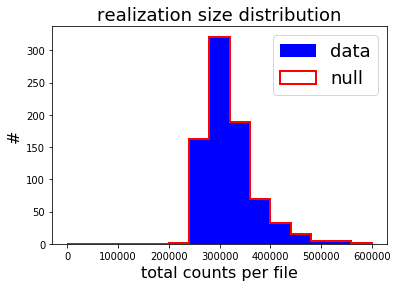

In [31]:
fig = plt.figure()
plt.hist(size, density=False, color='blue', range=(0,600000), bins = 15, label='data')
plt.hist(size_null, density=False, color='red', range=(0,600000), lw=2, histtype='step', bins = 15, label='null')
plt.title("realization size distribution", fontsize = 18)
plt.xlabel("total counts per file", fontsize=16)
plt.ylabel("#", fontsize=16)
plt.legend(fontsize=18)
plt.show()

In [32]:
fig.savefig("sizeDistr_null.pdf")

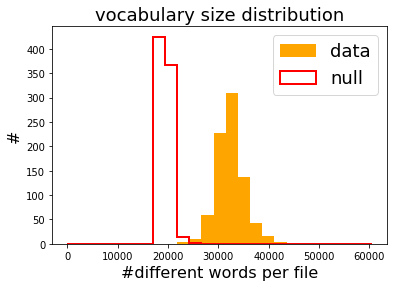

In [33]:
fig = plt.figure()
plt.hist(diffwords, density=False, color='orange', range=(0,60483), bins = 25, label = 'data')
plt.hist(diffwords_null, density=False, histtype='step', color='red', lw=2, range=(0,60483), bins = 25, label='null')
plt.title("vocabulary size distribution", fontsize=18)
plt.xlabel("#different words per file", fontsize=16)
plt.ylabel("#", fontsize=16)
plt.legend(fontsize=18)
plt.show()

In [34]:
fig.savefig("diffwordsDistr_null.pdf")

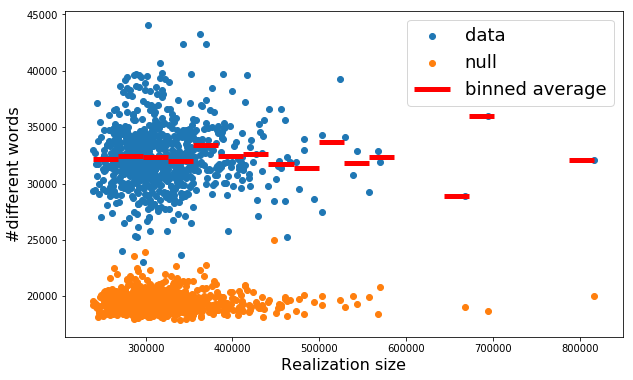

In [35]:
fig = plt.figure(figsize=(10,6))
plt.scatter(size, diffwords, label='data')
plt.scatter(size_null, diffwords_null, label='null')
plt.xlabel("Realization size", fontsize=16)
plt.ylabel("#different words", fontsize=16)
bin_means, bin_edges, binnumber = stats.binned_statistic(size, diffwords,statistic='mean', bins=20)
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='r', lw=5, label='binned average')
#bin_means_null, bin_edges_null, binnumber_null = stats.binned_statistic(size_null, diffwords_null, statistic='mean', bins=20)
#plt.hlines(bin_means_null, bin_edges_null[:-1], bin_edges_null[1:], colors='r', lw=5, label='binned average')
#plt.xscale('log')
#plt.yscale('log')
plt.legend(fontsize=18)
plt.show()

In [36]:
fig.savefig("heaps_null.pdf")